# Assignment 2: Neural Networks and Optimization (33 marks total)
### Due: October 3 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses a linear model and a neural network to perform a regression task. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Linear Regression vs. Neural Network

For this assignment, we will be using the concrete example from yellowbrick. We will be evaluating how well neural networks perform compared to linear regression.

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Step 1: Data Input (2 marks)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

*Note: the yellowbrick library is not included in the default Anaconda installation, so you will need to install it*

In [3]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_concrete

# TO DO: Print size and type of X and y (0.5 marks)
X, y = load_concrete()
print("X shape:", X.shape)
print("X type:", type(X))
print("y shape:", y.shape)
print("y type:", type(y))


X shape: (1030, 8)
X type: <class 'pandas.core.frame.DataFrame'>
y shape: (1030,)
y type: <class 'pandas.core.series.Series'>


In [4]:
# TO DO: Inspect the first few columns of the imported feature matrix (0.5 marks)
print(pd.DataFrame(X).head())


   cement   slag  ash  water  splast  coarse   fine  age
0   540.0    0.0  0.0  162.0     2.5  1040.0  676.0   28
1   540.0    0.0  0.0  162.0     2.5  1055.0  676.0   28
2   332.5  142.5  0.0  228.0     0.0   932.0  594.0  270
3   332.5  142.5  0.0  228.0     0.0   932.0  594.0  365
4   198.6  132.4  0.0  192.0     0.0   978.4  825.5  360


In [5]:
# TO DO: Use .describe() to inspect the mean and variance of each feature (0.5 marks)
print(pd.DataFrame(X).describe())


            cement         slag          ash        water       splast  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

            coarse         fine          age  
count  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136  
std      77.753818    80.175427    63.169912  
min     801.000000   594.000000     1.000000  
25%     932.000000   730.950000     7.000000  
50%     968.000000   779.510000    28.000000  
75% 

### Step 2: Data Processing (2 marks)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [7]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
print(f"Missing values in X: \n{np.isnan(X).sum()}")
print(f"Column types in X: \n{pd.DataFrame(X).dtypes}")


Missing values in X: 
cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64
Column types in X: 
cement    float64
slag      float64
ash       float64
water     float64
splast    float64
coarse    float64
fine      float64
age         int64
dtype: object


You can add the target vector and the feature matrix together and inspect the relationship between the features and target using a `pairplot()`

In [8]:
# TO DO: Add the target vector and the feature matrix together (0.5 marks)
data = pd.DataFrame(X)
data['target'] = y
print(data.head())

   cement   slag  ash  water  splast  coarse   fine  age     target
0   540.0    0.0  0.0  162.0     2.5  1040.0  676.0   28  79.986111
1   540.0    0.0  0.0  162.0     2.5  1055.0  676.0   28  61.887366
2   332.5  142.5  0.0  228.0     0.0   932.0  594.0  270  40.269535
3   332.5  142.5  0.0  228.0     0.0   932.0  594.0  365  41.052780
4   198.6  132.4  0.0  192.0     0.0   978.4  825.5  360  44.296075


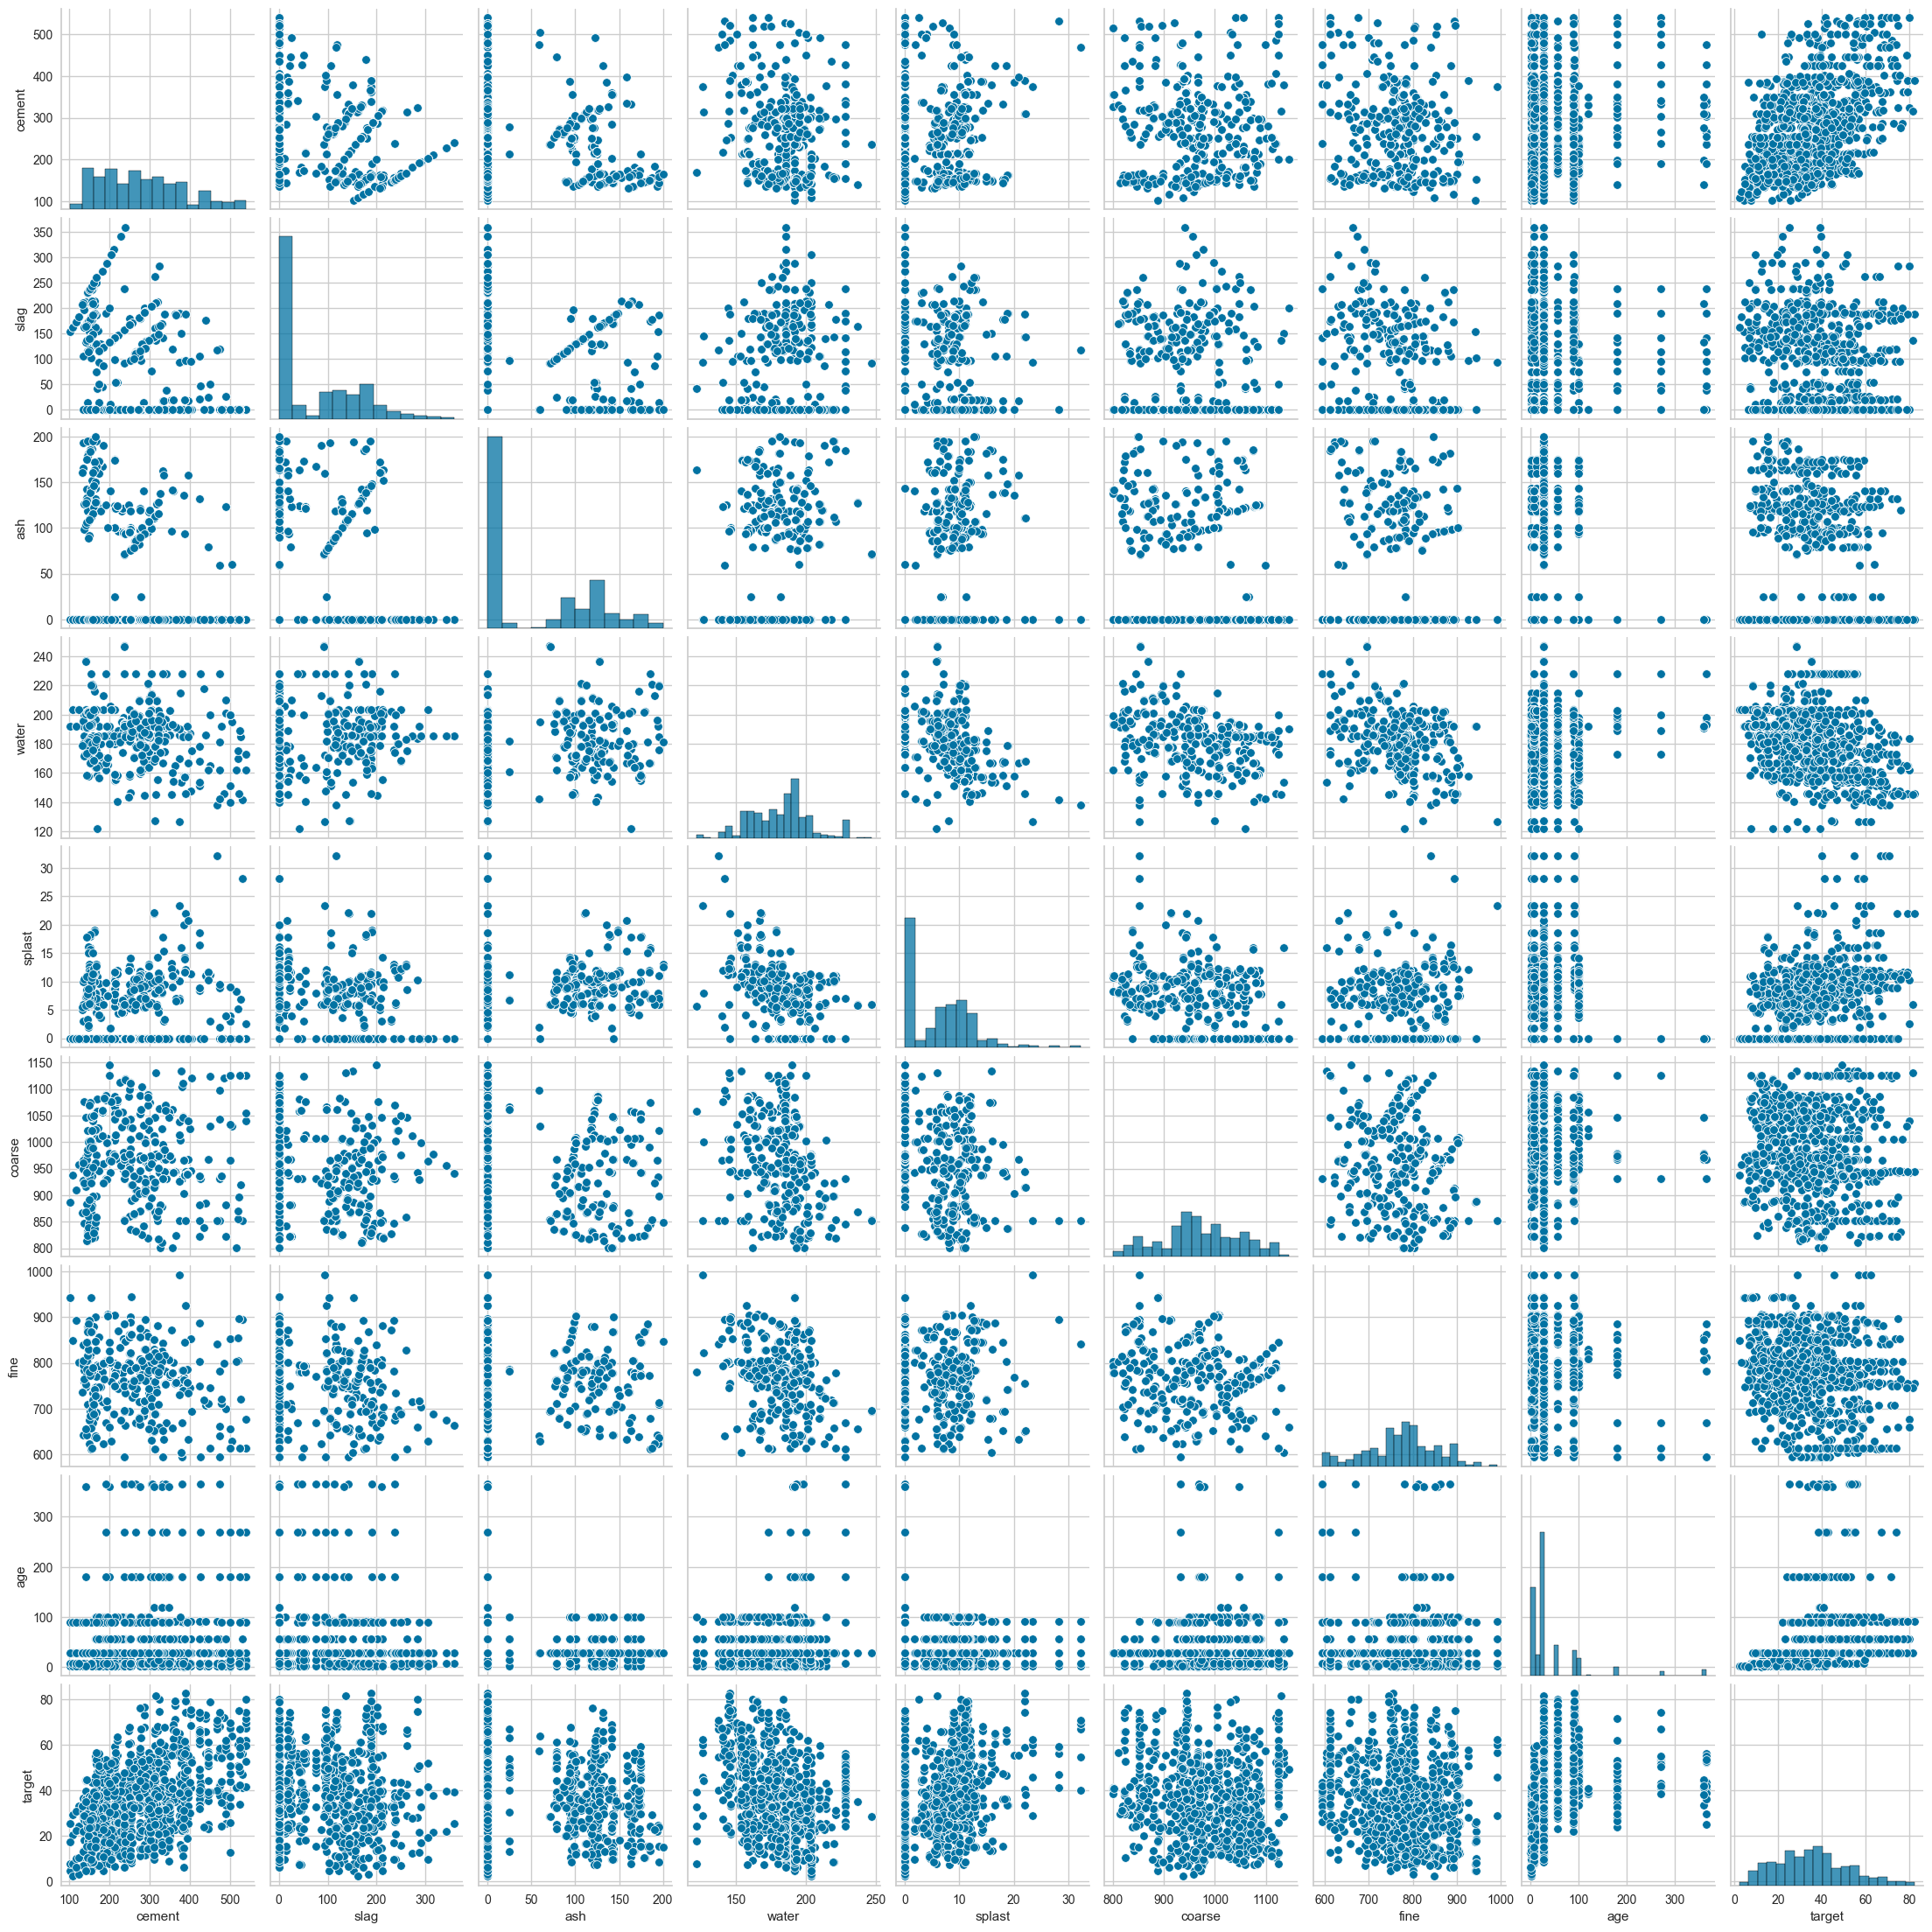

In [9]:
# TO DO: Use pairplot() (0.5 marks)
sns.pairplot(data)
plt.show()


The concrete data is already be split into the feature matrix and target vector. The next step is to split the data into training and testing subsets. For this assignment, you can use `train_test_split()` with `random_state=0`

In [13]:
# TO DO: Split the data into training and testing data (0.5 marks)
from sklearn.model_selection import train_test_split
train_features, test_features, target_train, target_test = train_test_split(X, y, random_state=0)


Looking at the mean and variance of the dataset, it is clear that the features have a wide range of values. You can use the code below to scale the feature matrix

*Note: `StandardScaler()` scales the data to a mean of 0 and a variance of 1*

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.transform(test_features)

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with the scaled data

In [19]:
# TO DO: ADD YOUR CODE HERE
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(train_scaled, target_train)
# predictions = model.predict(test_scaled)

LinearRegression()

### Step 4: Validate Model (3 marks)

Calculate the training and validation accuracy using mean squared error.

In [20]:
# TO DO: ADD YOUR CODE HERE (2 marks)
import sklearn.metrics as metrics
training_mse = metrics.mean_squared_error(target_train, model.predict(train_scaled))
validation_mse = metrics.mean_squared_error(target_test, model.predict(test_scaled))


In [21]:
# TO DO: Print the results (1 mark)
print(f"Training MSE: {training_mse}")
print(f"Validation MSE: {validation_mse}")


Training MSE: 111.35843861132469
Validation MSE: 95.90413603680642


## Part B: Neural Network

Now we will repeat the above analysis using a neural network. For this assignment, we will be using the PyTorch library.

In [39]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

### Step 2: Data Processing (2 marks)

To make this analysis easier, we can convert the data into tensors.

In [ ]:
# TO DO: Convert training and testing data to tensors (1 mark)
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
test_tensor = torch.tensor(test_scaled, dtype=torch.float32)
y_train = torch.tensor(target_train.values, dtype=torch.float32)
y_test = torch.tensor(target_test.values, dtype=torch.float32)

In [41]:
# TO DO: Print the size of the training features and labels (1 mark)
print(f"Training features tensor shape: {train_tensor.shape}")
print(f"Training labels tensor shape: {y_train.shape}")

Training features tensor shape: torch.Size([772, 8])
Training labels tensor shape: torch.Size([772])


The labels must be changed from a vector to a 2-D array to make sure that the math works properly. Use the provided code below to fix this issue:

In [42]:
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
print(y_train.size())

torch.Size([772, 1])


### Step 3: Implement Neural Network (10 marks)

For this assignment, we will use the SGD optimizer with the following parameters:
- Initial learning rate = 0.001
- Momentum = 0.9

We will use the same learning rate schedule that was used in the Backpropagation Example on D2L.

For the optimization process, we will need to both train and test the data for each epoch. It is up to you how you want to organize your code for this process. You will need to include the following steps:
- Load your data using the `DataLoader()`
- Define a model with two hidden layers with 50 hidden units each
- Choose your loss function
- initialize your optimizer
- Set up your training and testing loops for 100 epochs
    - Remember that you must go through the training and testing code for each epoch sequentially
- Print out the average training and testing loss for each epoch (or plot in graph)

In [67]:
from torch.optim.lr_scheduler import StepLR
# TO DO: ADD YOUR CODE HERE
train_dataloader = DataLoader(TensorDataset(train_tensor, y_train), batch_size=32, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_tensor, y_test), batch_size=32, shuffle=False)

# print(train_tensor.shape[1])
# print(y_train.shape[1])

# model = nn.Linear(train_tensor.shape[1], 1)

model = nn.Sequential(
    nn.Linear(train_tensor.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, y_train.shape[1])
)

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

for epoch in range(100):
    epoch_loss = 0.0
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_dataloader.dataset)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
    scheduler.step()

Epoch 1, Loss: 987.7424
Epoch 2, Loss: 462.0515
Epoch 3, Loss: 139.9360
Epoch 4, Loss: 100.4508
Epoch 5, Loss: 82.5594
Epoch 6, Loss: 81.1971
Epoch 7, Loss: 87.6284
Epoch 8, Loss: 59.6441
Epoch 9, Loss: 64.2107
Epoch 10, Loss: 46.6543
Epoch 11, Loss: 34.1595
Epoch 12, Loss: 31.4638
Epoch 13, Loss: 30.0071
Epoch 14, Loss: 29.5162
Epoch 15, Loss: 28.3191
Epoch 16, Loss: 27.1402
Epoch 17, Loss: 26.3305
Epoch 18, Loss: 25.2703
Epoch 19, Loss: 24.1579
Epoch 20, Loss: 25.3208
Epoch 21, Loss: 22.3931
Epoch 22, Loss: 22.6462
Epoch 23, Loss: 22.1677
Epoch 24, Loss: 21.5264
Epoch 25, Loss: 22.7389
Epoch 26, Loss: 21.1907
Epoch 27, Loss: 22.0303
Epoch 28, Loss: 21.3398
Epoch 29, Loss: 20.8956
Epoch 30, Loss: 20.7045
Epoch 31, Loss: 19.6459
Epoch 32, Loss: 19.3072
Epoch 33, Loss: 19.5296
Epoch 34, Loss: 19.2229
Epoch 35, Loss: 19.2698
Epoch 36, Loss: 19.6985
Epoch 37, Loss: 19.5427
Epoch 38, Loss: 18.7959
Epoch 39, Loss: 19.5291
Epoch 40, Loss: 19.5679
Epoch 41, Loss: 18.5238
Epoch 42, Loss: 18.19

### Questions (6 marks)
1. How did the results from the linear model compare to the results from the neural network? Why do you think one performed better than the other?
1. If you run the optimization/backpropagation code multiple times, you will see that you get different loss values. Why is this?
1. Compare the results from SGD to using Adam with default parameters and a constant learning rate of 0.01. Which model would you select to use and why?

*ANSWER HERE*


1. The linear model had a mean square error of 111 on the training and 95 on the validation set. Comparing against the loss of the neural network of 17.8 we can see the neural network performed much better. The neural network perfomed better because it has the ability to predict non-linear relationships where the linear model can only predict linear relationships accuratly.
2. Since the optimization/backpropagation code will be updating the weights of model running the code multiple times will change the weights and therefore change the model predictions result in different loss values.
3. Using SGD as our optimizer we get a mean square error of about 17.8. Using Adam we get a mean square error of about 42.6. Comparing these two potential optimizers we see that SGD results in a much lower mean square error showing a much better model result.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

1. The websites I used to source my code are the scikit-yb.org website for information on importing the data and the pytorch.org website for information on DataLoader and TensorData functions. I also used the examples provided on D2L. I used ChatGPT to help provide examples of using the the imported libraries and to help explain what specifics steps were doing from the D2l examples.
2. I completed the steps in order from beginning to end however I needed to go back and fix my dataprocessing step for my neural network because there were errors that caused the model to be incorrectly trained.
3. For some of the generative AI I used I asked it what the MSE error should be for the training and validation on the linear regression. It then asked what data set I was using so I told it I was using the Yellowbrick Concrete dataset and it responded with a brief description of the data and the training MSE should be ~80-130 and validation MSE should be about ~90-150. I used this just as a sanity check to make sure I wasn't getting wildly wrong answers.
4. I had some difficulty understanding some of the data transformations I did on the data. For example turning the data into tensors for the neural network I just sort of accepted it and found that I didn't have the understanding to check if I was doing it correctly.

## Part 2: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that we got to go through the whole process of training a linear model along with a neural network that allowed us to see the difference between them and see how much better the neural network performed. I would have liked more experience with the data processing side of things so that I could have understood better what it means to clean data and represent it in the best way for the specific model. Maybe this will be covered in later assignments but it felt a bit rushed in this one.